In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv", error_bad_lines=False)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Country and region is a nominal Data and we dont need this for model building. 

In [3]:
df.shape


(158, 12)

In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

#### There is no null values. 

In [7]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


#### Count is same in all the columns: 158 that means no NaN's. Mean and S.D of columns Generosity, Trust and Standard error seems close. we don't need Happiness Rank as it is discrete data. 

In [8]:
df = df.drop(columns = ['Happiness Rank', 'Country','Region'])
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [9]:
df.shape

(158, 9)

## EDA - (Exploratory Data Analysis) and Visualization: 

#### will check how data is distributed for every column in our dataset:

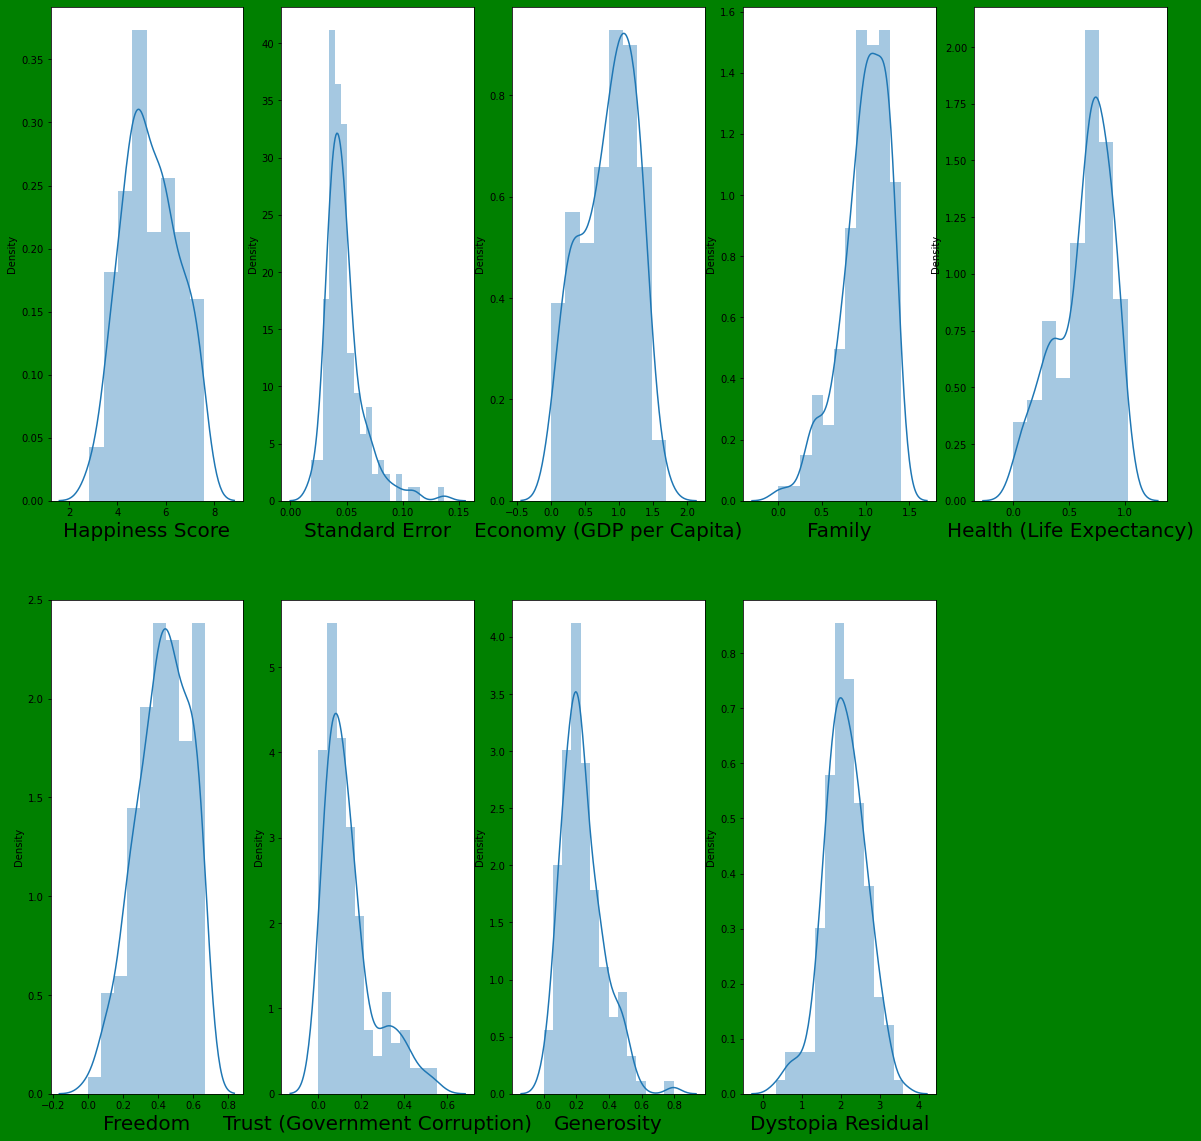

In [10]:
## DistPlot:
plt.figure(figsize = (20,20), facecolor = 'green')
plotnumber = 1 ## initializing 1 to a name

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(2,5,plotnumber) ## 2 raw 5 column
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        plotnumber += 1
        plt.tight_layout
        


#### as we can see columns standard error, Trust and Generosity are skewed. Will remove the skewness. 

## Skewness: 

In [11]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

##### Skewness threshold is taken as =/-50. Columns having skewness are: Standard Error, Family, Health, Trust, Generosity. 

## Checking for the outliers: 

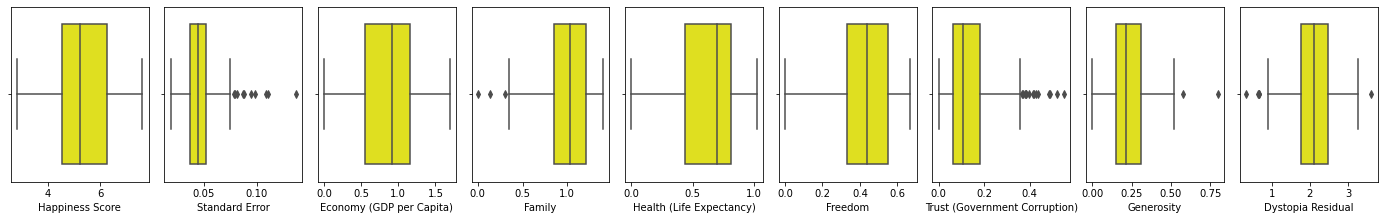

In [12]:
# BoxPlot: 

collist = df.columns.values
ncol = 30 
nrows = 14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(ncol, nrows, i+1)
    sns.boxplot(df[collist[i]], color= 'yellow', orient = 'v')
    plt.tight_layout()

In [13]:
## Checking outliers: 

def IQR_outliers(df):

     Q1=df.quantile(0.25)
     Q3=df.quantile(0.75)
     IQR=Q3-Q1
     df=df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
     return df

In [14]:
IQR_outliers(df['Family'])

147    0.00000
152    0.30285
157    0.13995
Name: Family, dtype: float64

In [15]:
index = np.where(IQR_outliers(df['Family']))
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

(156, 9)


,index,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
2,4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
3,5,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
4,6,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
...,...,...,...,...,...,...,...,...,...,...
151,153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [16]:
IQR_outliers(df['Standard Error'])

39     0.09811
40     0.10895
62     0.07832
64     0.13693
93     0.07896
96     0.09438
100    0.08742
115    0.11068
125    0.08096
156    0.08658
Name: Standard Error, dtype: float64

In [17]:
index = np.where(IQR_outliers(df['Standard Error']))
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

(146, 9)


,index,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,12,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320
1,13,7.187,0.04176,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074,3.60214
2,14,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011
3,15,6.983,0.04076,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,3.26001
4,16,6.946,0.03499,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,1.96961
...,...,...,...,...,...,...,...,...,...,...
141,153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
142,154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
143,155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
144,156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [18]:
IQR_outliers(df['Trust (Government Corruption)'])

16     0.37798
19     0.38583
20     0.32067
21     0.32524
23     0.49210
27     0.52208
34     0.32524
71     0.37124
90     0.39928
129    0.38331
153    0.55191
Name: Trust (Government Corruption), dtype: float64

In [19]:
index = np.where(IQR_outliers(df['Trust (Government Corruption)']))
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

(135, 9)


,index,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,23,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501
1,24,6.786,0.04910,1.06353,1.19850,0.79661,0.54210,0.09270,0.24434,2.84848
2,25,6.750,0.01848,1.32792,1.29937,0.89186,0.61477,0.21843,0.28214,2.11569
3,26,6.670,0.05800,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,2.67585
4,27,6.611,0.06257,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674
...,...,...,...,...,...,...,...,...,...,...
130,153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
131,154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
132,155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
133,156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [20]:
IQR_outliers(df['Generosity'])

33     0.57630
36     0.51752
73     0.51535
90     0.50318
128    0.79588
Name: Generosity, dtype: float64

In [21]:
index = np.where(IQR_outliers(df['Generosity']))
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

(130, 9)


,index,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,28,6.575,0.03512,1.27778,1.26038,0.94579,0.55011,0.20646,0.12332,2.21126
1,29,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600
2,30,6.505,0.04168,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,2.67782
3,31,6.485,0.04539,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,2.32142
4,32,6.477,0.05051,0.91861,1.24018,0.69077,0.53466,0.05120,0.18401,2.85737
...,...,...,...,...,...,...,...,...,...,...
125,153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
126,154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
127,155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
128,156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [22]:
IQR_outliers(df['Dystopia Residual'])

71     0.65429
131    0.67108
153    0.67042
155    0.32858
Name: Dystopia Residual, dtype: float64

In [23]:
index = np.where(IQR_outliers(df['Dystopia Residual']))
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

(126, 9)


,index,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,32,6.477,0.05051,0.91861,1.24018,0.69077,0.53466,0.05120,0.18401,2.85737
1,33,6.455,0.03557,0.96690,1.26504,0.73850,0.55664,0.03187,0.57630,2.31945
2,34,6.411,0.04633,1.39541,1.08393,0.72025,0.31048,0.32524,0.13706,2.43872
3,35,6.329,0.03468,1.23011,1.31379,0.95562,0.45951,0.06398,0.18227,2.12367
4,36,6.302,0.04206,1.20740,1.30203,0.88721,0.60365,0.13586,0.51752,1.64880
...,...,...,...,...,...,...,...,...,...,...
121,153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
122,154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
123,155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
124,156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [24]:
## Percentage Dataloss: 
loss_percent = (158-126)/158*100
loss_percent

20.253164556962027

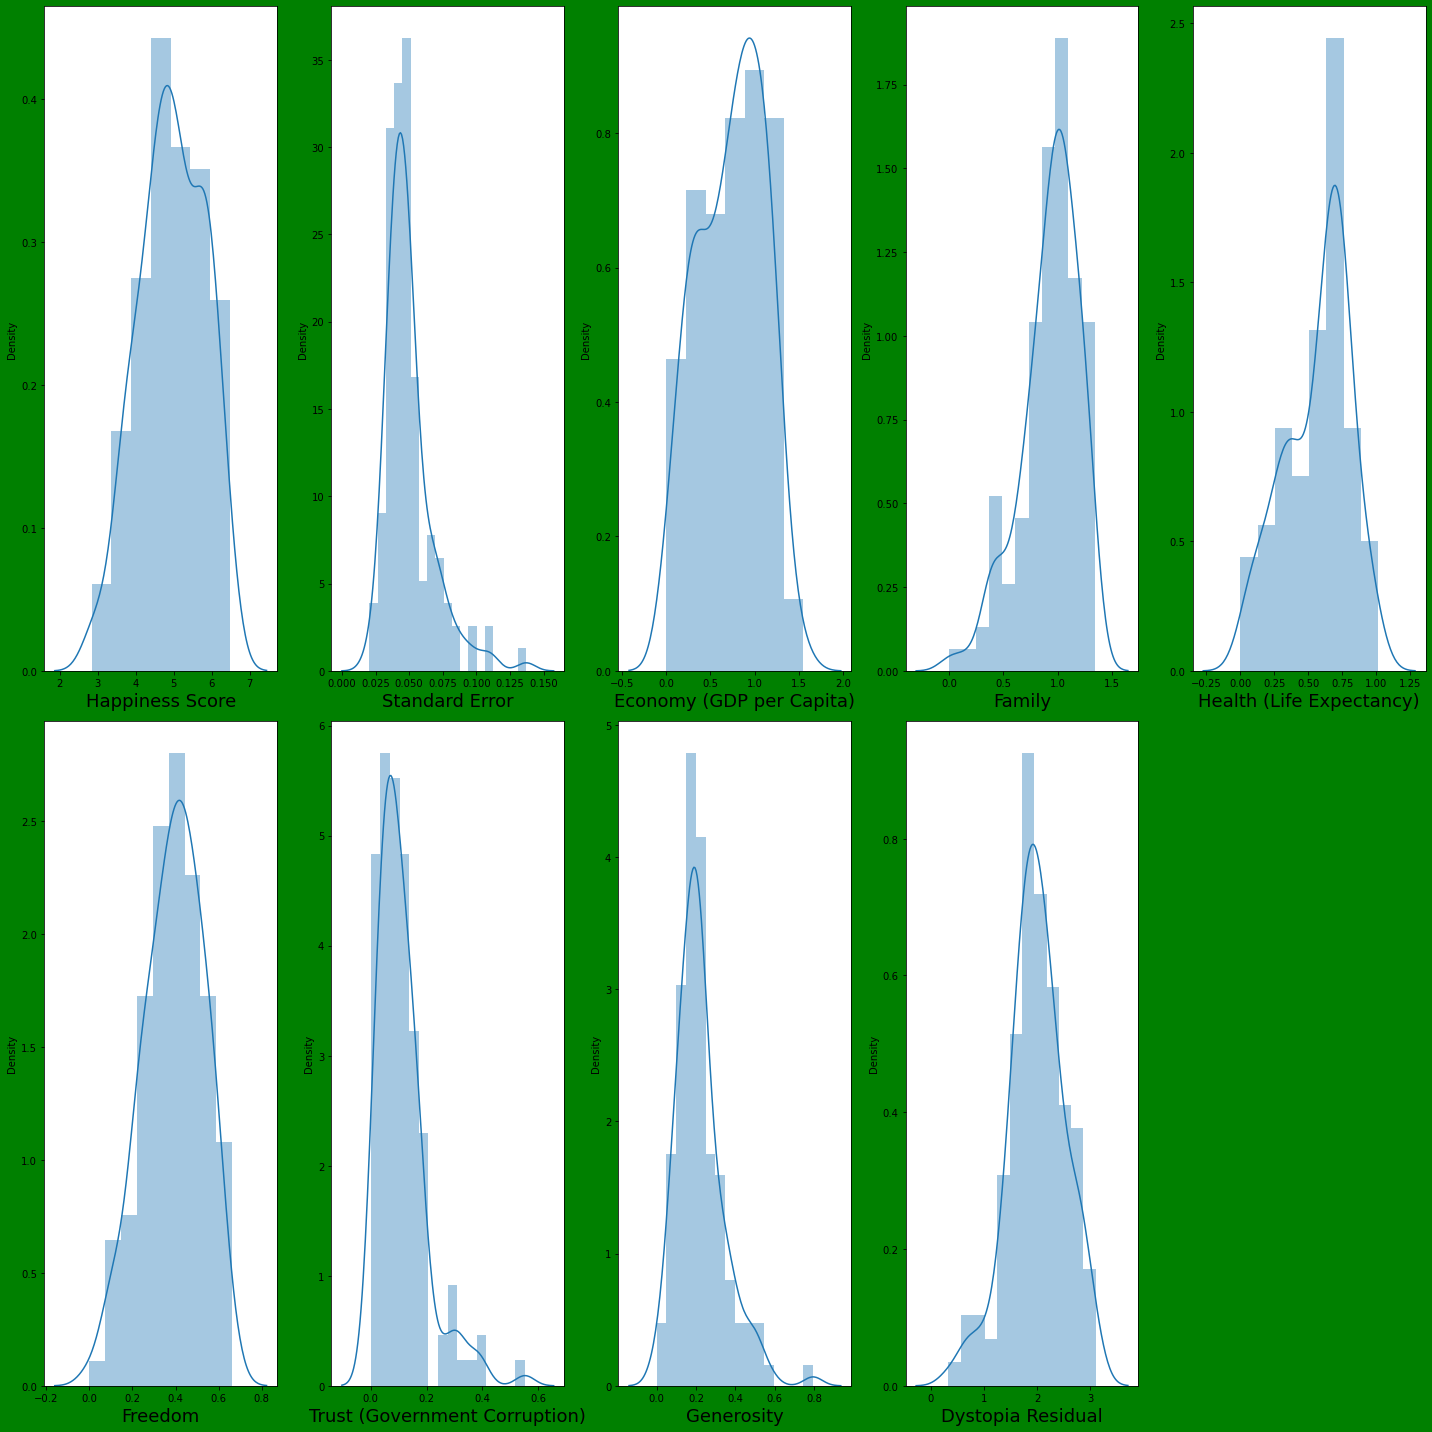

In [25]:
## Now will check if the skewness is handled or not after removing outliers. 
# Dist plot

plt.figure(figsize = (20,20), facecolor = 'green')
plotnumber = 1  # intializing 1 to a name

for column in df:
    if plotnumber <=9:
        ax = plt.subplot(2,5,plotnumber) #  In 2 rows 5 columns to be plotted. 
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 18)
        plotnumber += 1
        plt.tight_layout()

#### Skweness looks better after treting the outliers. 

## Now Data will be divide into label and features. 

In [26]:
x = df.iloc[:,1:]
y = df.iloc[:,:1]
x
y

,Happiness Score
32,6.477
33,6.455
34,6.411
35,6.329
36,6.302
...,...
153,3.465
154,3.340
155,3.006
156,2.905


## Correlation:

### Visualizing Relationship between Features and label. 

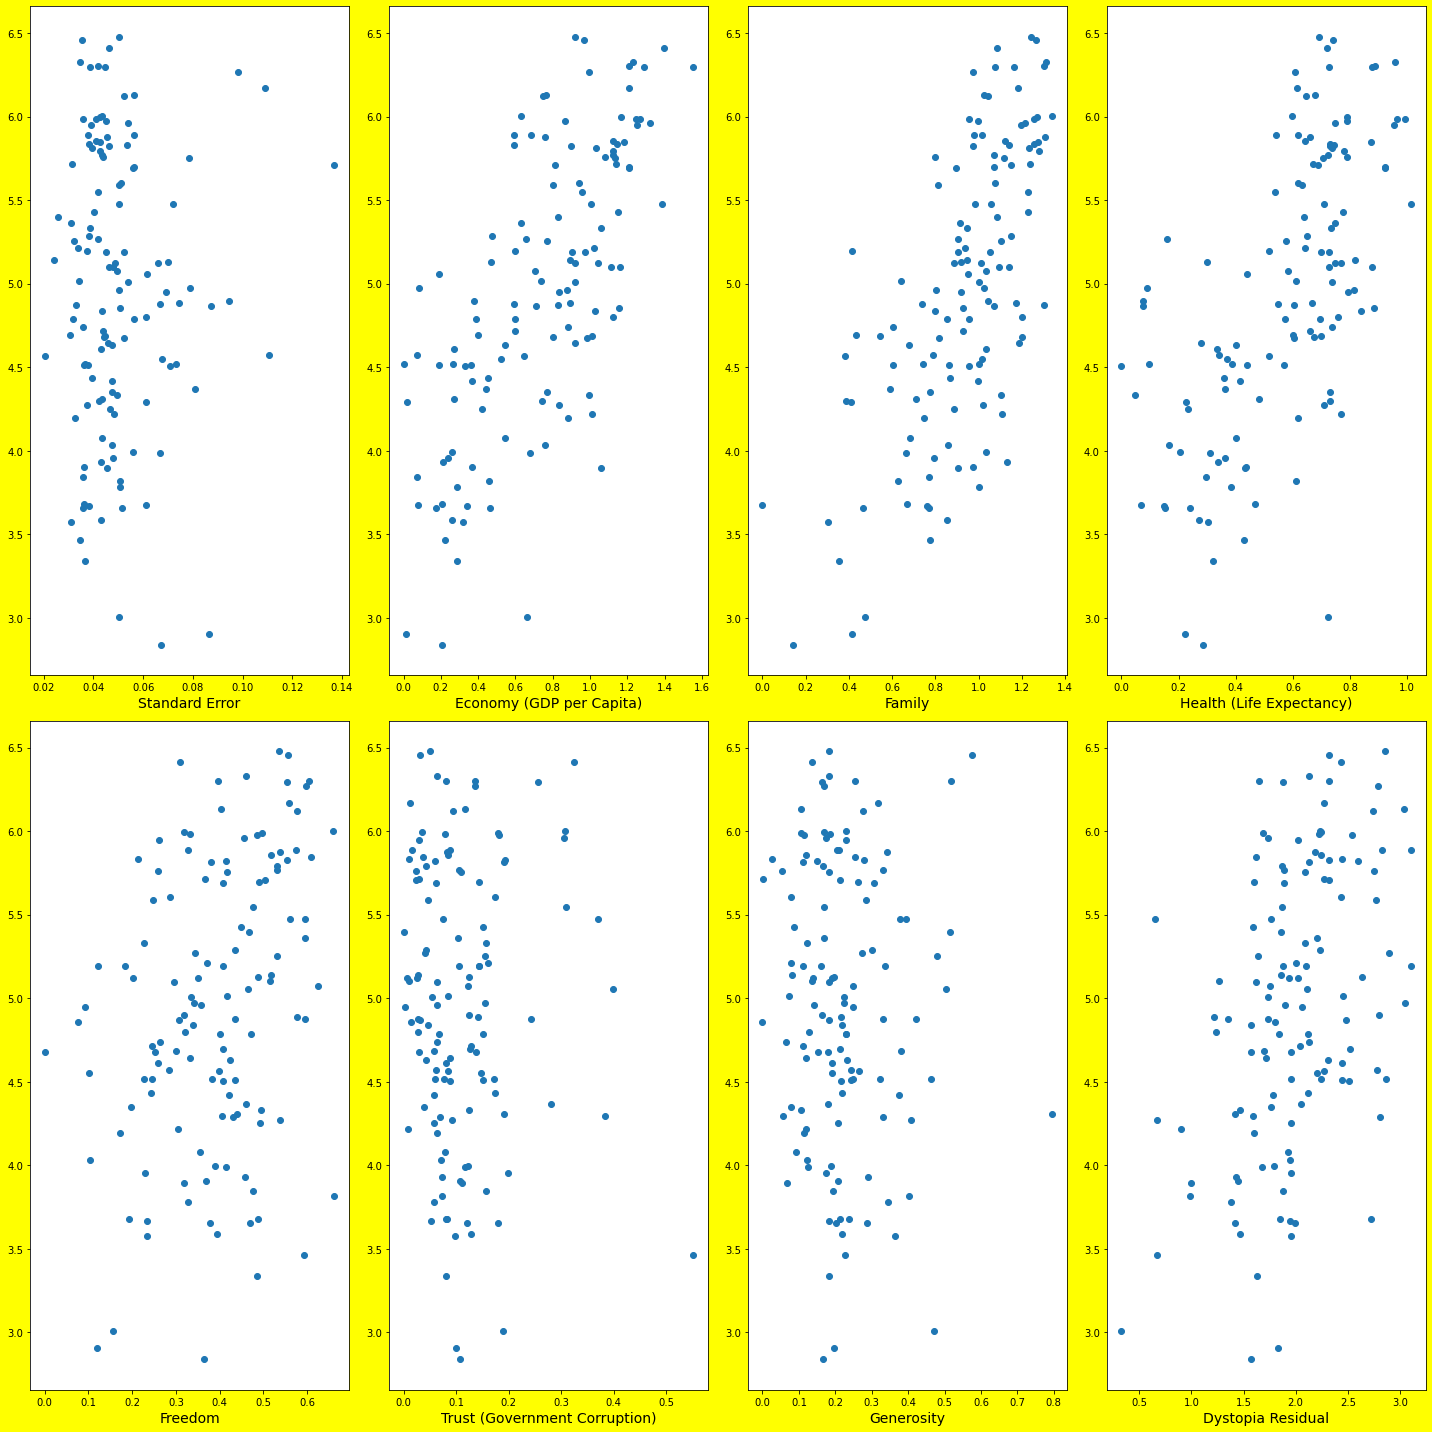

In [27]:
## Will use Scatter plot to find relationship between x and y.

plt.figure(figsize = (20,20), facecolor = "yellow")
plotnumber = 1

for column in x: 
    if plotnumber<= 8: 
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 14)
        plotnumber +=1
        plt.tight_layout()

#### we can see positivie trend in almost all the subplots except Standard error, Trust (Government curruption)and Generosity.and the remaining columns, relationship with happiness score is linear. 

In [28]:
df.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,0.019756,0.696569,0.673425,0.625620,0.320761,-0.047797,-0.048655,0.435287
Standard Error,0.019756,1.000000,-0.100567,0.011636,-0.215843,0.020551,-0.019731,0.020577,0.185809
Economy (GDP per Capita),0.696569,-0.100567,1.000000,0.552117,0.764503,0.101981,-0.092046,-0.250073,-0.151698
Family,0.673425,0.011636,0.552117,1.000000,0.397506,0.261379,-0.075533,-0.074330,-0.020795
Health (Life Expectancy),0.625620,-0.215843,0.764503,0.397506,1.000000,0.139517,-0.061715,-0.054391,-0.190589
Freedom,0.320761,0.020551,0.101981,0.261379,0.139517,1.000000,0.245640,0.272500,-0.117020
Trust (Government Corruption),-0.047797,-0.019731,-0.092046,-0.075533,-0.061715,0.245640,1.000000,0.090780,-0.201446
Generosity,-0.048655,0.020577,-0.250073,-0.074330,-0.054391,0.272500,0.090780,1.000000,-0.161270
Dystopia Residual,0.435287,0.185809,-0.151698,-0.020795,-0.190589,-0.117020,-0.201446,-0.161270,1.000000


## correlation using Heatmap: 

<AxesSubplot:>

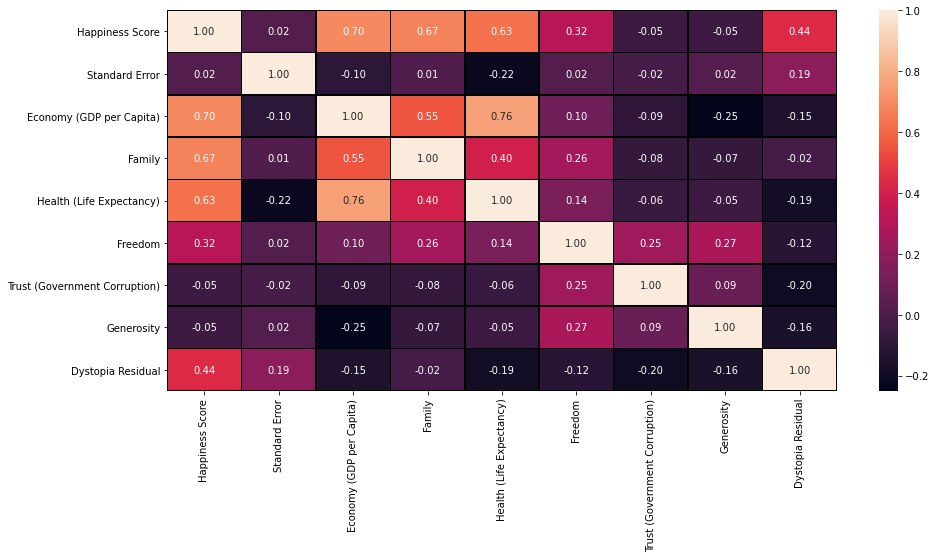

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor="black", fmt = '.2f')


#### Outcomes of correlation: with happiness score:
#### Standard Error 2% : Weak bond.  Economy(gdp per capita) 70% : Strong bond. Family 67% : Strong bond. Health 63% : Strong bond. Freedom 32% : Good bond. Trust(Government Curruption) 5% : Weak bond. Generosity 5% : Weak bond. Dystopia 44% : Strong bond. 

#### Max Corr: Economy (GDP per Capita) 70%. 
#### Min Corr: Standard error 2%, Trust(govt. Curruption) 5%, Generosity 5%. 

## Multicollinearity: 

In [30]:
# when 2 features tell same story, will eleminate one which is less imp. in contributing label. will scale our data and then will apply multicollinearity. 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scale = sc.fit_transform(x)
x_scale.shape



(126, 8)

In [31]:
x_scale.shape[1]


8

In [32]:
x_scale

array([[ 0.03034341,  0.49269176,  1.18330066, ..., -0.66839577,
        -0.30602187,  1.62316402],
       [-0.80706532,  0.62356417,  1.27741858, ..., -0.88412296,
         2.88056417,  0.6096635 ],
       [-0.20395167,  1.78488405,  0.59175099, ...,  2.38995297,
        -0.68739844,  0.83438131],
       ...,
       [ 0.01016489, -0.19950378, -1.71402445, ...,  0.87015319,
         2.03162561, -3.14135484],
       [ 2.05211938, -1.95540014, -1.93746932, ..., -0.11685732,
        -0.1983104 , -0.30682419],
       [ 0.96976579, -1.43131427, -2.98207979, ..., -0.0421954 ,
        -0.4457381 , -0.8075453 ]])

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scale,i) for i in range(x_scale.shape[1])]
vif['features'] = x.columns
vif

,vif,features
0,1.096426,Standard Error
1,3.349602,Economy (GDP per Capita)
2,1.570734,Family
3,2.676119,Health (Life Expectancy)
4,1.276754,Freedom
5,1.136238,Trust (Government Corruption)
6,1.272819,Generosity
7,1.162651,Dystopia Residual


## Dividing data to features and label once again:

In [34]:
x = df.iloc[:,1:]
y = df.iloc[:,:1]
x
y

,Happiness Score
32,6.477
33,6.455
34,6.411
35,6.329
36,6.302
...,...
153,3.465
154,3.340
155,3.006
156,2.905


## Power Transform: transforming data to remove if any skewness is still present. 

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.03034341,  0.49269176,  1.18330066, ..., -0.66839577,
        -0.30602187,  1.62316402],
       [-0.80706532,  0.62356417,  1.27741858, ..., -0.88412296,
         2.88056417,  0.6096635 ],
       [-0.20395167,  1.78488405,  0.59175099, ...,  2.38995297,
        -0.68739844,  0.83438131],
       ...,
       [ 0.01016489, -0.19950378, -1.71402445, ...,  0.87015319,
         2.03162561, -3.14135484],
       [ 2.05211938, -1.95540014, -1.93746932, ..., -0.11685732,
        -0.1983104 , -0.30682419],
       [ 0.96976579, -1.43131427, -2.98207979, ..., -0.0421954 ,
        -0.4457381 , -0.8075453 ]])

## Train Test Split: 

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state = 50)
y_train.head()

,Happiness Score
87,5.102
86,5.123
129,4.297
157,2.839
47,5.975


## Model Training: 

In [51]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

#### Since our model is trained lets predict with out model and compare with actual. 

In [52]:
df.tail()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


#### this is the actual dataframe, will pick one row and convert x features into scaled data and predict the Happiness score and will compare with Actual. 
### let see how good is our model. 

In [53]:
print("Happiness Score is:", lr.predict(sc.fit_transform([[0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726]])))

Happiness Score is: [[4.952556]]


#### The Actual Happiness score for the above data is: 2.839. 

## Saving the mode: 

In [54]:
import pickle
filename = 'Final Happiness.pickle'
pickle.dump(lr,open(filename, 'wb'))

## Prediction using saved model:

In [55]:
loaded_model = pickle.load(open(filename,'rb'))
a = loaded_model.predict(sc.fit_transform([[0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302]]))
a

array([[4.952556]])

#### The Actual Happiness score for the above data is: 2.905.

## Adjusted r^2 value: 
#### With adjusted value we  can judgewheather the data is Regression equation is good fit or not. 


In [57]:
# Linear regression training score:
lr.score(x_train,y_train)

0.9999998868924581

In [59]:
## lets see how good our model fit the test data: 
lr.score(x_test,y_test)

0.9999998704434989

#### Outcome: Regression Training score is 99%, Testing score is 99%. 

## Compare y_test and y_ predict to check the model performance: 

In [60]:
## Will plot and visualize: will make prediction for the x_test data and compare the obtained predict values with the actual y_test values to check our model performance. 
y_pred = lr.predict(x_test)
y_pred

array([[5.47707891],
       [5.99511805],
       [5.47372989],
       [5.85524552],
       [4.5714609 ],
       [4.71475587],
       [6.32894356],
       [4.56471341],
       [5.09757716],
       [4.51702337],
       [5.07327779],
       [6.26935211],
       [4.85757842],
       [5.95963386],
       [5.68878311],
       [3.93074336],
       [2.90454785],
       [5.12423188],
       [5.94820416],
       [4.60967295],
       [5.82415785],
       [5.88978862],
       [3.46469434],
       [5.42854987],
       [5.36026665],
       [4.78792595]])

In [62]:
y_test  # y_test has 20% of our data which corresponds to x_test. we splitted our data with test size= .20. 

,Happiness Score
70,5.477
44,5.995
71,5.474
53,5.855
115,4.571
107,4.715
35,6.329
116,4.565
88,5.098
119,4.517


### we have y_pred values, lets plot with y_test:

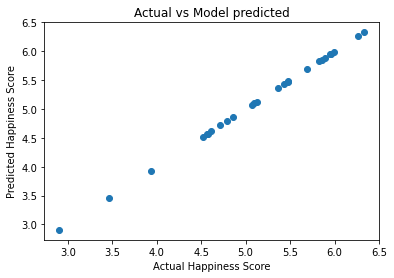

In [63]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Model predicted')
plt.show()

#### we can see that the graph is fairly linear. letsanalyze with some samples as actual = 3.5 predicted is also 3.5. Actual = 4.0 predicted is also 4.0. Actual= 5.5 predicted is also around 5.5. 
#### Our model is working good. 

## Model Evaluation: 

In [69]:
# It represent error of our linear regression model. 
# Mean absolute error, Root mean squared error, mean squared error. 
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = lr.predict(x_test)
mean_absolute_error(y_test,y_pred)
print("MAE=", mean_absolute_error(y_test,y_pred))

MAE= 0.00026676156739235957


In [68]:
mean_squared_error(y_test,y_pred)
print("MSE=", mean_squared_error(y_test,y_pred))

MSE= 8.930189104198586e-08


In [67]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE=", RMSE)

RMSE= 0.0002988342199982891


#### we want scores to be high and evaluation metrics MSE, MAE, RMSE to be low. 
#### In our Regression model: 1) Testing score is 99% which is very good.

## Regularizartion: for checking if our model is overfitted.

##### Regularization helps to reduce the variance of our model without a substantial increase in the bias. It helps to reduce this generalization error and not the training error. It reduces by ignoring the less important features. It also helps prevent overfitting, making the model more robust and decreasing the complexity of a model.


In [70]:
from sklearn.linear_model import Lasso,LassoCV
lsCV = LassoCV(alphas=None, max_iter=100, normalize=True)
lsCV.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [71]:
## best Learning rate alpha.

alpha = lsCV.alpha_
print("alpha=", alpha)

alpha= 5.7363196144468404e-05


#### Now we have a bests learning parameter, lets use Lasso R. and seehow well our data is fitted before.

In [73]:
## The best learning rate alpha
laso_r = Lasso(alpha)
laso_r.fit(x_train,y_train)

Lasso(alpha=5.7363196144468404e-05)

In [74]:
laso_r.score(x_test,y_test)

0.999999848860477

## Conclusion: 
#### Our Lesso model gave 99% with best possible learning rate. Also, earlier, our model "Regression" also gave 99% testing Score.  Our Linear Regression model is not overfitted. 

In [20]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Here I am going to plot the top 10 happiest countries along with their scores on a line chart. For this purpose I will first create a dataframe conaining the names of top ten countries. 
#I will plot other charts on the basis of this copy of the data frame.

In [21]:
df_copy = df.head(10).copy()
df_copy

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
10,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
11,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728


Text(0.5, 1.0, 'Happiness Scores')

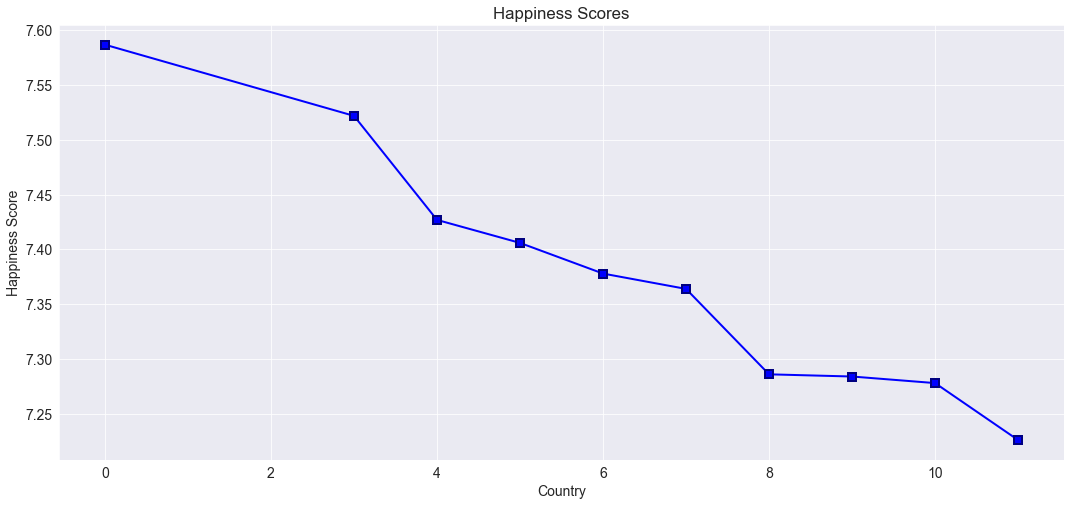

In [22]:
plt.figure(figsize=(18, 8))
scores = df_copy["Happiness Score"]
plt.plot(scores, marker='s', c='b', ls='-', lw=2, ms=8, mew=2, mec='navy')

plt.xlabel('Country')
plt.ylabel('Happiness Score')

plt.title("Happiness Scores")

#### In the above graph, as we move on the x-axis from left to right or from more happy countries to less happy countries, the line showing the relationship between countries and their scores goes downward.